In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sys

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import spatial
import time
import scipy.linalg
import healpy as hp

sys.path.insert(0,"/home/deparis/jupyter/pyemma/")
from pyemma import *
%cd "~/Emma"

%load_ext autoreload
%autoreload 2
%connect_info

/home/deparis/Emma
{
  "control_port": 38643,
  "key": "5dddf752-f899-4e57-a4b8-d2ce6354c133",
  "shell_port": 37731,
  "signature_scheme": "hmac-sha256",
  "hb_port": 52648,
  "stdin_port": 38840,
  "iopub_port": 34166,
  "ip": "127.0.0.1",
  "transport": "tcp"
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing /run/user/1003/jupyter/kernel-ae81d149-b546-463e-b827-0f1e5e4d9db8.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.


In [2]:
runset=db.Runset()
runset.load()
runset.get_description()
runset.get_folder()

00 run de base -> m2
01 masse d'etoile *8 -> m1
02 même masse d'étoile mais pas de SN
03 masse d'etoile *8 mais pas de SN
04 masse d'étoile /8 -> m3
05 même masse d'étoile mais SN thermique
06 même masse d'étoile mais SN kin simple sans eject
07 même masse d'étoile mais SN kin simple avec eject
08 même masse d'étoile mais sans tirage de Poisson __ DOUTE
09 tout pareil mais avec flux __ PROBLEME
10 RERUN tout pareil mais avec flux
00 /home/deparis/curie_data/data/8_8_gather_6/
01 /home/deparis/curie_data/data/8_8_gather_7/
02 /home/deparis/curie_data/data/8_8_gather_8/
03 /home/deparis/curie_data/data/8_8_gather_9/
04 /home/deparis/curie_data/data/8_8_gather_10/
05 /home/deparis/curie_data/data/8_8_gather_11/
06 /home/deparis/curie_data/data/8_8_gather_12/
07 /home/deparis/curie_data/data/8_8_gather_13/
08 /home/deparis/curie_data/data/8_8_gather_14/
09 /home/deparis/curie_data/data/8_8_gather_15/
10 /home/deparis/curie_data/data/8_8_gather_16/


In [168]:
run1=io.Run(runset.runs[10].folder) 

In [260]:
print(runset.runs[0].labels)
cur_run=run1
cur_step=cur_run.step_00017

m2 SN1


In [205]:
run2=io.Run(runset.runs[1].folder)

In [256]:
print(runset.runs[1].labels)
cur_run=run2
cur_step=cur_run.step_00016

m1 SN1


In [10]:
#cur_cat.gen(8,cur_run.param.info.nproc)

cur_step.fof.read_masst()
cur_step.fof.read_struct()

cur_step.fof.get_R200(cur_run.param.info.ob, cur_run.param.info.om)

#________________________________________________________________________
cur_step.fof.get_part(cur_step.part, force=0)
cur_step.fof.get_part_mass(cur_step.part,cur_run.param.info)

# cur_step.fof.get_part_fine(cur_step.part, force=0)
cur_step.fof.get_part_mass_fine(cur_run.param.info)

#________________________________________________________________________
cur_step.fof.get_star(cur_step.star, force=0)
cur_step.fof.get_star_mass(cur_step.star,cur_run.param.info)

cur_step.fof.get_stars_fine(cur_step.grid, cur_step.star)
cur_step.fof.get_star_mass_fine(cur_step.star,cur_run.param.info)

#________________________________________________________________________
cur_step.fof.get_cells(cur_step.grid, force=0)
cur_step.fof.get_gas_mass(cur_step.grid,cur_run.param.info)

cur_step.fof.get_cells_fine(cur_step.grid)
cur_step.fof.get_gas_mass_fine(cur_step.grid,cur_run.param.info)

#________________________________________________________________________

cur_step.fof.get_mean_vel()

part_mass allready loaded, use force=1 to reload
star_mass allready loaded, use force=1 to reload
loading /home/deparis/curie_data/data/8_8_gather_16/data/00017/halo/cells
loading /home/deparis/curie_data/data/8_8_gather_16/data/00017/halo/cells_fine
grid_l allready loaded, use force=1 to reload
grid_field.d allready loaded, use force=1 to reload


# DM PROFILE

In [ ]:
n=3

nbins=32
plt.figure()

################################################################################

arg= np.argsort(cur_step.fof.npart)
halo_num=arg[-n]

xc=cur_step.fof.x[halo_num]
yc=cur_step.fof.y[halo_num]
zc=cur_step.fof.z[halo_num]

cur_step.part.x.read()
cur_step.part.y.read()
cur_step.part.z.read()
cur_step.part.mass.read()

part=cur_step.fof.part[halo_num]
x=cur_step.part.x.data[part]
y=cur_step.part.y.data[part]
z=cur_step.part.z.data[part]
m=cur_step.part.mass.data[part]

r= np.sqrt( np.power(x-xc,2)+np.power(y-yc,2)+np.power(z-zc,2))

bins=np.linspace(0,np.max(r),nbins+1)
_x=(bins[1:]+bins[:-1])/2

V = 4./3.*np.pi * np.power(bins,3)
dV = np.diff(V)

n1,_=np.histogram(r,bins=bins)
h11,_=np.histogram(r,bins=bins,weights=m)
h12,_=np.histogram(r,bins=bins,weights=m*m)
err1 = np.sqrt(h12/n1 - h11*h11/n1/n1)  /np.sqrt(n1) *3.

# plt.errorbar(_x,h11/dV,yerr=err1)
plt.errorbar(_x,h11/dV,yerr=err1)

plt.yscale("log")
plt.xlabel("Radius [box unit]")
plt.ylabel("DM density")

# STELLAR PROFILE

In [ ]:
n=2
nbins=32
plt.figure()

################################################################################

arg= np.argsort(cur_step.fof.npart)
halo_num=arg[-n]

xc=cur_step.fof.x[halo_num]
yc=cur_step.fof.y[halo_num]
zc=cur_step.fof.z[halo_num]

cur_step.star.x.read()
cur_step.star.y.read()
cur_step.star.z.read()
cur_step.star.mass.read()

stars=cur_step.fof.stars[halo_num]
x=cur_step.star.x.data[stars]
y=cur_step.star.y.data[stars]
z=cur_step.star.z.data[stars]
m=cur_step.star.mass.data[stars]

r= np.sqrt( np.power(x-xc,2)+np.power(y-yc,2)+np.power(z-zc,2))

bins=np.linspace(np.min(r),np.max(r),nbins+1)
_x=(bins[1:]+bins[:-1])/2

V = 4./3.*np.pi * np.power(bins,3)
dV = np.diff(V)

n1,_=np.histogram(r,bins=bins)
h11,_=np.histogram(r,bins=bins,weights=m)
h12,_=np.histogram(r,bins=bins,weights=m*m)
err1 = np.sqrt(h12/n1 - h11*h11/n1/n1)  /np.sqrt(n1) *3.

plt.errorbar(_x,h11/dV,yerr=err1)

plt.legend()
plt.yscale("log")
plt.xlabel("Radius [box unit]")
plt.ylabel("Stellar density")

In [ ]:
n=4
nbins=32
plt.figure()

################################################################################

arg= np.argsort(cur_step.fof.npart)
halo_num=arg[-n]

xc=cur_step.fof.x[halo_num]
yc=cur_step.fof.y[halo_num]
zc=cur_step.fof.z[halo_num]

cur_step.grid.x.read()
cur_step.grid.y.read()
cur_step.grid.z.read()
cur_step.grid.l.read()
cur_step.grid.field_d.read()

cells=cur_step.fof.cells[halo_num]
x=cur_step.grid.x.data[cells]-xc
y=cur_step.grid.y.data[cells]-yc
z=cur_step.grid.z.data[cells]-zc
l=cur_step.grid.l.data[cells]
dv=np.power(0.5,3*l)
m=cur_step.grid.field_d.data[cells]*dv

r= np.sqrt( np.power(x,2)+np.power(y,2)+np.power(z,2))

bins=np.linspace(np.min(r),np.max(r),nbins+1)
_x=(bins[1:]+bins[:-1])/2

V = 4./3.*np.pi * np.power(bins,3)
dV = np.diff(V)

n1,_=np.histogram(r,bins=bins)
h11,_=np.histogram(r,bins=bins,weights=m)
h12,_=np.histogram(r,bins=bins,weights=m*m)
err1 = np.sqrt(h12/n1 - h11*h11/n1/n1)  /np.sqrt(n1) *3.

# plt.errorbar(_x,h11,yerr=err1)
plt.errorbar(_x,h11/dV,yerr=err1)

plt.legend()
plt.yscale("log")
plt.xlabel("Radius [box unit]")
plt.ylabel("Gas density")

# HYDRO FLUX PROFILE

In [ ]:
n=4
nbins=32
plt.figure()

################################################################################

arg= np.argsort(cur_step.fof.npart)
halo_num=arg[-n]

xc=cur_step.fof.x[halo_num]
yc=cur_step.fof.y[halo_num]
zc=cur_step.fof.z[halo_num]

cur_step.grid.x.read()
cur_step.grid.y.read()
cur_step.grid.z.read()
cur_step.grid.field_d.read()
cur_step.grid.field_u.read()
cur_step.grid.field_v.read()
cur_step.grid.field_w.read()

cells=cur_step.fof.cells[halo_num]
x=cur_step.grid.x.data[cells]-xc
y=cur_step.grid.y.data[cells]-yc
z=cur_step.grid.z.data[cells]-zc
d=cur_step.grid.field_d.data[cells]
u=cur_step.grid.field_u.data[cells]
v=cur_step.grid.field_v.data[cells]
w=cur_step.grid.field_w.data[cells]

r= np.sqrt( np.power(x,2)+np.power(y,2)+np.power(z,2))

m=(x*u+y*v+z*w)/r 
m*= 4*np.pi*np.power(r,2)

bins=np.linspace(np.min(r),np.max(r),nbins+1)
_x=(bins[1:]+bins[:-1])/2

n1,_=np.histogram(r,bins=bins)
h11,_=np.histogram(r,bins=bins,weights=m)
h12,_=np.histogram(r,bins=bins,weights=m*m)
err1 = np.sqrt(h12/n1 - h11*h11/n1/n1)  /np.sqrt(n1) *3.

plt.errorbar(_x,-h11,yerr=err1)

plt.legend()
#plt.yscale("log")
plt.xlabel("Radius [box unit]")
plt.ylabel("Radial Inflow")
plt.title("Hydrodynamical radial Inflow")

# RADIATION OUTFLOW

<IPython.core.display.Javascript object>


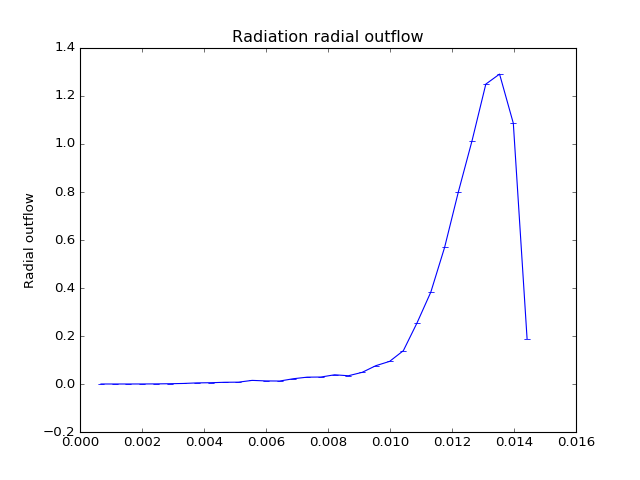

In [19]:
n=2


nbins=32

################################################################################

arg= np.argsort(cur_step.fof.npart)
halo_num=arg[-n]

xc=cur_step.fof.x[halo_num]
yc=cur_step.fof.y[halo_num]
zc=cur_step.fof.z[halo_num]

cur_step.grid.x.read()
cur_step.grid.y.read()
cur_step.grid.z.read()
cur_step.grid.rfield_fx0.read()
cur_step.grid.rfield_fy0.read()
cur_step.grid.rfield_fz0.read()

cells=cur_step.fof.cells[halo_num]
x=cur_step.grid.x.data[cells]-xc
y=cur_step.grid.y.data[cells]-yc
z=cur_step.grid.z.data[cells]-zc
u=cur_step.grid.rfield_fx0.data[cells]
v=cur_step.grid.rfield_fy0.data[cells]
w=cur_step.grid.rfield_fz0.data[cells]

r= np.sqrt( np.power(x,2)+np.power(y,2)+np.power(z,2))

m=(x*u+y*v+z*w)/r 
m*= 4*np.pi*np.power(r,2)

bins=np.linspace(np.min(r),np.max(r),nbins+1)
_x=(bins[1:]+bins[:-1])/2


n1,_=np.histogram(r,bins=bins)
h11,_=np.histogram(r,bins=bins,weights=m)
h12,_=np.histogram(r,bins=bins,weights=m*m)
err1 = np.sqrt(h12/n1 - h11*h11/n1/n1)  /np.sqrt(n1) *3.

plt.figure()
plt.errorbar(_x,h11,yerr=err1)

#plt.yscale("log")
plt.ylabel("Radial outflow")
plt.title("Radiation radial outflow")


# f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10,10))

# ax1.errorbar(_x, h11)
# # ax1.set_yscale('log')
# ax1.set_ylabel("Outflow")

# ax2.errorbar(_x, -h11)
# # ax2.set_yscale('log')
# ax2.set_ylabel("Inflow")

# # max_bound= max(np.max(h11[h11>0]),-np.min(h11[h11<0]))
# # min_bound= 10**np.int(np.log10(min(np.min(h11[h11>0]),-np.max(h11[h11<0]))))

# # ax1.set_ylim(min_bound, max_bound)
# # ax2.set_ylim(min_bound, max_bound)
# ax2.invert_yaxis()



# f.subplots_adjust(hspace=0)
# plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
# plt.xlabel("Radius [box unit]")

# HYDRO

In [154]:
cur_step.grid.x.read()
cur_step.grid.y.read()
cur_step.grid.z.read()
cur_step.grid.field_d.read()
cur_step.grid.field_u.read()
cur_step.grid.field_v.read()
cur_step.grid.field_w.read()

Nbins=3

mh=cur_step.fof.part_mass_fine
Mbins=np.logspace(np.log10(np.min(mh)), np.log10(np.max(mh)), Nbins+1)

r_tot=np.empty(Nbins,dtype=np.object)
m_tot=np.empty(Nbins,dtype=np.object)

for i in range(Nbins):

    r_bin=[]
    m_bin=[]
    
    for halo_num in np.where( (mh>=Mbins[i])  & (mh<Mbins[i+1]) )[0] :
        
        xc=cur_step.fof.x[halo_num]
        yc=cur_step.fof.y[halo_num]
        zc=cur_step.fof.z[halo_num]

        cells=cur_step.fof.cells[halo_num]
        x=cur_step.grid.x.data[cells]-xc
        y=cur_step.grid.y.data[cells]-yc
        z=cur_step.grid.z.data[cells]-zc
        
        d=cur_step.grid.field_d.data[cells]
        u=cur_step.grid.field_u.data[cells]*d
        v=cur_step.grid.field_v.data[cells]*d
        w=cur_step.grid.field_w.data[cells]*d

        r= np.sqrt( np.power(x,2)+np.power(y,2)+np.power(z,2))  / cur_step.fof.R200[halo_num]
        m=(x*u+y*v+z*w)/r * (4*np.pi*np.power(r,2))
                
        r_bin.append(r)
        m_bin.append(m)

    r_tot[i]=np.concatenate(r_bin)
    m_tot[i]=np.concatenate(m_bin)

grid_x allready loaded, use force=1 to reload
grid_y allready loaded, use force=1 to reload
grid_z allready loaded, use force=1 to reload
grid_field.d allready loaded, use force=1 to reload
grid_field.u allready loaded, use force=1 to reload
grid_field.v allready loaded, use force=1 to reload
grid_field.w allready loaded, use force=1 to reload


<IPython.core.display.Javascript object>


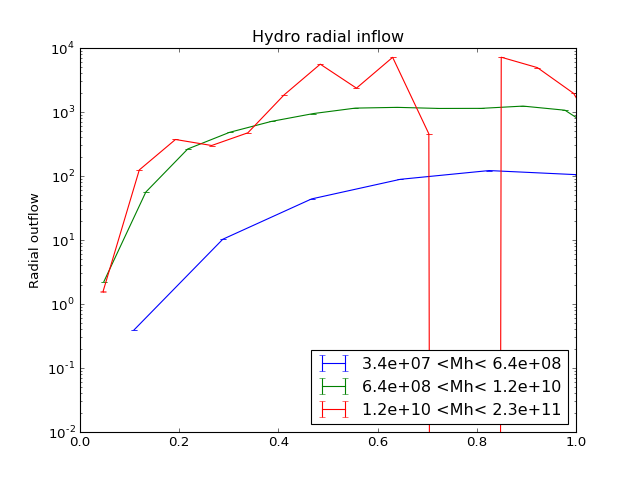

(0, 1)

In [155]:
plt.figure()

for i in range(Nbins):

    nbins=16
    bins=np.linspace(np.min(r_tot[i]),np.max(r_tot[i]),nbins+1)
    _x=(bins[1:]+bins[:-1])/2

    n1,_=np.histogram(r_tot[i],bins=bins)
    h11,_=np.histogram(r_tot[i],bins=bins,weights=m_tot[i])
    h12,_=np.histogram(r_tot[i],bins=bins,weights=m_tot[i]*m_tot[i])
    err1 = np.sqrt(h12/n1 - h11*h11/n1/n1)  /np.sqrt(n1) *3.

    lab= ("%.1e <Mh< %.1e"%(Mbins[i],Mbins[i+1] ))
    plt.errorbar(_x,-h11,yerr=err1, label=lab)

plt.yscale("log")
plt.ylabel("Radial outflow")
plt.title("Hydro radial inflow")
plt.legend(loc=4)
plt.xlim(0,1)

# RAD

In [156]:
cur_step.grid.x.read()
cur_step.grid.y.read()
cur_step.grid.z.read()
cur_step.grid.rfield_fx0.read()
cur_step.grid.rfield_fy0.read()
cur_step.grid.rfield_fz0.read()

Nbins=3

mh=cur_step.fof.part_mass_fine
Mbins=np.logspace(np.log10(np.min(mh)), np.log10(np.max(mh)), Nbins+1)

r_tot=np.empty(Nbins,dtype=np.object)
m_tot=np.empty(Nbins,dtype=np.object)

for i in range(Nbins):

    r_bin=[]
    m_bin=[]
    
    for halo_num in np.where( (mh>=Mbins[i])  & (mh<Mbins[i+1]) )[0] :
        
        xc=cur_step.fof.x[halo_num]
        yc=cur_step.fof.y[halo_num]
        zc=cur_step.fof.z[halo_num]

        cells=cur_step.fof.cells[halo_num]
        x=cur_step.grid.x.data[cells]-xc
        y=cur_step.grid.y.data[cells]-yc
        z=cur_step.grid.z.data[cells]-zc
        u=cur_step.grid.rfield_fx0.data[cells]
        v=cur_step.grid.rfield_fy0.data[cells]
        w=cur_step.grid.rfield_fz0.data[cells]

        r= np.sqrt( np.power(x,2)+np.power(y,2)+np.power(z,2)) / cur_step.fof.R200[halo_num]
        m=(x*u+y*v+z*w)/r * (4*np.pi*np.power(r,2))
                
        r_bin.append(r)
        m_bin.append(m)

    r_tot[i]=np.concatenate(r_bin)
    m_tot[i]=np.concatenate(m_bin)

grid_x allready loaded, use force=1 to reload
grid_y allready loaded, use force=1 to reload
grid_z allready loaded, use force=1 to reload
grid_rfield.fx[0] allready loaded, use force=1 to reload
grid_rfield.fy[0] allready loaded, use force=1 to reload
grid_rfield.fz[0] allready loaded, use force=1 to reload


<IPython.core.display.Javascript object>


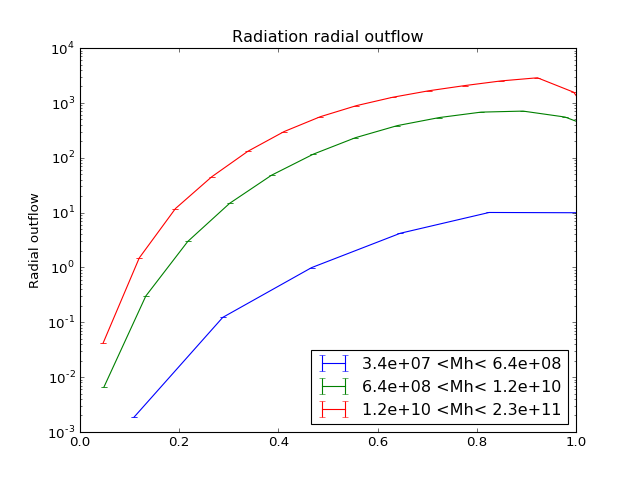

(0, 1)

In [157]:
plt.figure()

for i in range(Nbins):

    nbins=16
    bins=np.linspace(np.min(r_tot[i]),np.max(r_tot[i]),nbins+1)
    _x=(bins[1:]+bins[:-1])/2

    n1,_=np.histogram(r_tot[i],bins=bins)
    h11,_=np.histogram(r_tot[i],bins=bins,weights=m_tot[i])
    h12,_=np.histogram(r_tot[i],bins=bins,weights=m_tot[i]*m_tot[i])
    err1 = np.sqrt(h12/n1 - h11*h11/n1/n1)  /np.sqrt(n1) *3.

    lab= ("%.1e <Mh< %.1e"%(Mbins[i],Mbins[i+1] ))
    plt.errorbar(_x,h11,yerr=err1, label=lab)

plt.yscale("log")
plt.ylabel("Radial outflow")
plt.title("Radiation radial outflow")
plt.legend(loc=4)

plt.xlim(0,1)

In [225]:
cur_step.grid.x.read()
cur_step.grid.y.read()
cur_step.grid.z.read()
cur_step.star.x.read()
cur_step.star.y.read()
cur_step.star.z.read()

cur_step.fof.get_part_mass_fine()
cur_step.fof.get_star(cur_step.star)
cur_step.fof.get_luminosity(cur_step)

Nbins=4

mh=cur_step.fof.part_mass_fine
Mbins=np.logspace(np.log10(np.min(mh)), np.log10(np.max(mh)), Nbins+1)
Mbins=np.logspace(7,7+Nbins,Nbins+1)

r_tot=np.empty(Nbins,dtype=np.object)
m_tot=np.empty(Nbins,dtype=np.object)

for i in range(Nbins):

    r_bin=[]
    m_bin=[]
    
    for halo_num in np.where( (mh>=Mbins[i])  & (mh<Mbins[i+1]) )[0] :
        
        xc=cur_step.fof.x[halo_num]
        yc=cur_step.fof.y[halo_num]
        zc=cur_step.fof.z[halo_num]
        stars = cur_step.fof.stars[halo_num]
        
        x=cur_step.star.x.data[stars]-xc
        y=cur_step.star.y.data[stars]-yc
        z=cur_step.star.z.data[stars]-zc
        
        r= np.sqrt( np.power(x,2)+np.power(y,2)+np.power(z,2)) / cur_step.fof.R200[halo_num]
        m= cur_step.star.flux[stars] 
                
        r_bin.append(r)
        m_bin.append(m)

    r_tot[i]=np.concatenate(r_bin)
    m_tot[i]=np.concatenate(m_bin)

#     args = np.argsort(r_tot[i])
#     r_tot[i] = (r_tot[i])[args]
#     m_tot[i] = np.cumsum((m_tot[i])[args])

grid_x allready loaded, use force=1 to reload
grid_y allready loaded, use force=1 to reload
grid_z allready loaded, use force=1 to reload
star_x allready loaded, use force=1 to reload
star_y allready loaded, use force=1 to reload
star_z allready loaded, use force=1 to reload


<IPython.core.display.Javascript object>


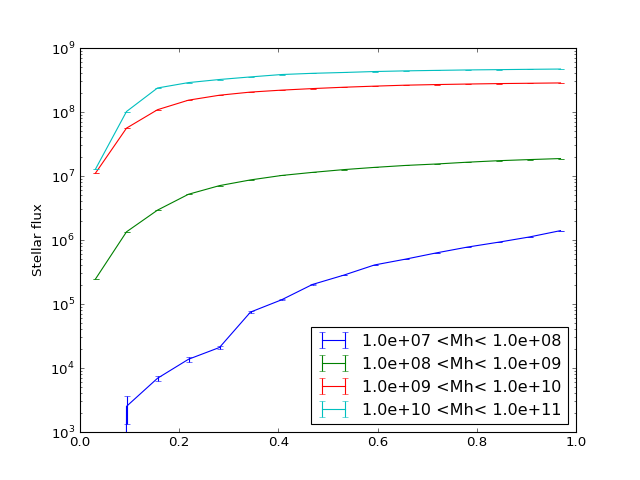

/usr/local/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide


(0, 1)

In [226]:
plt.figure()

for i in range(Nbins):

    nbins=16
#     bins=np.linspace(np.min(r_tot[i]),np.max(r_tot[i]),nbins+1)
    bins=np.linspace(0,1,nbins+1)
    _x=(bins[1:]+bins[:-1])/2

    
    n1,_=np.histogram(r_tot[i],bins=bins)
    h11,_=np.histogram(r_tot[i],bins=bins,weights=m_tot[i])
    h12,_=np.histogram(r_tot[i],bins=bins,weights=m_tot[i]*m_tot[i])
    err1 = np.sqrt(h12/n1 - h11*h11/n1/n1)  /np.sqrt(n1) *3.

    h11=np.cumsum(h11)
    lab= ("%.1e <Mh< %.1e"%(Mbins[i],Mbins[i+1] ))
    plt.errorbar(_x,h11,yerr=err1, label=lab)

plt.yscale("log")
plt.ylabel("Stellar flux")
plt.title("")
plt.legend(loc=4)

plt.xlim(0,1)

In [258]:
cur_step.grid.x.read()
cur_step.grid.y.read()
cur_step.grid.z.read()
cur_step.grid.rfield_fx0.read()
cur_step.grid.rfield_fy0.read()
cur_step.grid.rfield_fz0.read()
cur_step.star.x.read()
cur_step.star.y.read()
cur_step.star.z.read

cur_step.fof.get_cells(cur_step.grid)
cur_step.fof.get_part_mass_fine()
cur_step.fof.get_star(cur_step.star)
cur_step.fof.get_luminosity(cur_step)


Nbins=4

mh=cur_step.fof.part_mass_fine
# Mbins=np.logspace(np.log10(np.min(mh)), np.log10(np.max(mh)), Nbins+1)
Mbins=np.logspace(8,8+Nbins,Nbins+1)

flux_r_tot=np.empty(Nbins,dtype=np.object)
flux_m_tot=np.empty(Nbins,dtype=np.object)

star_r_tot=np.empty(Nbins,dtype=np.object)
star_m_tot=np.empty(Nbins,dtype=np.object)

for i in range(Nbins):

    flux_r_bin=[]
    flux_m_bin=[]
    star_r_bin=[]
    star_m_bin=[]
    
    for halo_num in np.where( (mh>=Mbins[i])  & (mh<Mbins[i+1]) )[0] :
        
        xc=cur_step.fof.x[halo_num]
        yc=cur_step.fof.y[halo_num]
        zc=cur_step.fof.z[halo_num]

        cells=cur_step.fof.cells[halo_num]
        
        x=cur_step.grid.x.data[cells]-xc
        y=cur_step.grid.y.data[cells]-yc
        z=cur_step.grid.z.data[cells]-zc
        
        u=cur_step.grid.rfield_fx0.data[cells]
        v=cur_step.grid.rfield_fy0.data[cells]
        w=cur_step.grid.rfield_fz0.data[cells]

        flux_r= np.sqrt( np.power(x,2)+np.power(y,2)+np.power(z,2)) / cur_step.fof.R200[halo_num]
        flux_m=(x*u+y*v+z*w)/flux_r * (4*np.pi*np.power(flux_r,2))
                
        flux_r_bin.append(flux_r)
        flux_m_bin.append(flux_m)
        
        stars=cur_step.fof.stars[halo_num]
        
        x=cur_step.star.x.data[stars]-xc
        y=cur_step.star.y.data[stars]-yc
        z=cur_step.star.z.data[stars]-zc
        
        star_r= np.sqrt( np.power(x,2)+np.power(y,2)+np.power(z,2)) / cur_step.fof.R200[halo_num]
        star_m= cur_step.star.flux[stars] 
        
        star_r_bin.append(star_r)
        star_m_bin.append(star_m)
        
    star_r_tot[i]=np.concatenate(star_r_bin)
    star_m_tot[i]=np.concatenate(star_m_bin)
    
    flux_r_tot[i]=np.concatenate(flux_r_bin)
    flux_m_tot[i]=np.concatenate(flux_m_bin)

grid_x allready loaded, use force=1 to reload
grid_y allready loaded, use force=1 to reload
grid_z allready loaded, use force=1 to reload
grid_rfield.fx[0] allready loaded, use force=1 to reload
grid_rfield.fy[0] allready loaded, use force=1 to reload
grid_rfield.fz[0] allready loaded, use force=1 to reload
star_x allready loaded, use force=1 to reload
star_y allready loaded, use force=1 to reload
Reading cells


<IPython.core.display.Javascript object>


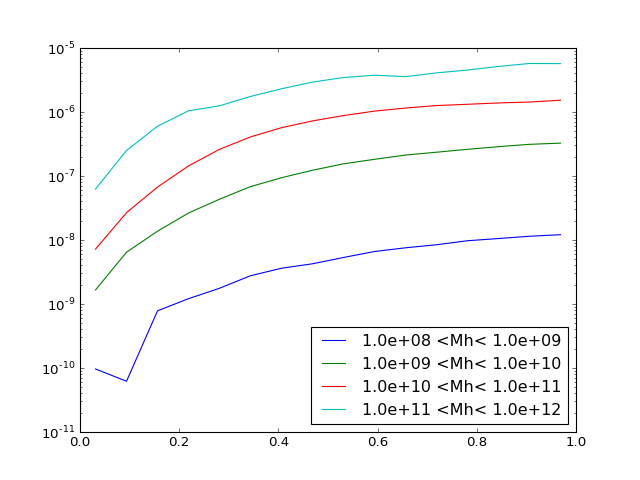

(1e-11, 1e-05)

In [259]:
plt.figure()

for i in range(Nbins):

    nbins=16
    bins=np.linspace(0,1,nbins+1)
    _x=(bins[1:]+bins[:-1])/2

    star_n1,_=np.histogram(star_r_tot[i],bins=bins)
    star_h11,_=np.histogram(star_r_tot[i],bins=bins,weights=star_m_tot[i])
    star_h11/=star_n1
    
    flux_n1,_=np.histogram(flux_r_tot[i],bins=bins)
    flux_h11,_=np.histogram(flux_r_tot[i],bins=bins,weights=flux_m_tot[i])
    flux_h11/=flux_n1
    
    star_h11=np.cumsum(star_h11)

    lab= ("%.1e <Mh< %.1e"%(Mbins[i],Mbins[i+1] ))
    plt.errorbar(_x,flux_h11/star_h11, label=lab)

plt.yscale("log")
plt.ylabel("")
plt.title("")
plt.legend(loc=0)

plt.xlim(0,1)
plt.ylim(1e-11,1e-5)